# L'incidence de la varicelle

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [41]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv?v=8nhxe"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [42]:
data_file = "varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [43]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202346          7   6089     2918    9260       9           4   
1     202345          7   5090     2713    7467       8           4   
2     202344          7   3688     1664    5712       6           3   
3     202343          7   3891     1675    6107       6           3   
4     202342          7   3968     1212    6724       6           2   
5     202341          7   3356     1764    4948       5           3   
6     202340          7   2845     1410    4280       4           2   
7     202339          7   1739      629    2849       3           1   
8     202338          7   1663      274    3052       3           1   
9     202337          7   1122      223    2021       2           1   
10    202336          7    726       10    1442       1           0   
11    202335          7    961       96    1826       1           0   
12    202334          7   1168        9    2327       2           0   
13    202333          7   3308     1184    5432       5           2   
14    202332          7   7996     1120   14872      12           2   
15    202331          7   3318     1398    5238       5           2   
16    202330          7   5821     3269    8373       9           5   
17    202329          7  13558     8297   18819      20          12   
18    202328          7   6700     4043    9357      10           6   
19    202327          7   7253     4599    9907      11           7   
20    202326          7   9192     6223   12161      14          10   
21    202325          7  11498     8257   14739      17          12   
22    202324          7  11115     7968   14262      17          12   
23    202323          7  12563     6134   18992      19           9   
24    202322          7  12184     8125   16243      18          12   
25    202321          7  11349     7598   15100      17          11   
26    202320          7   9000     4615   13385      14           7   
27    202319          7   9344     6091   12597      14           9   
28    202318          7  10671     7291   14051      16          11   
29    202317          7   9184     6162   12206      14           9   
...      ...        ...    ...      ...     ...     ...         ...   
1690  199126          7  17608    11304   23912      31          20   
1691  199125          7  16169    10700   21638      28          18   
1692  199124          7  16171    10071   22271      28          17   
1693  199123          7  11947     7671   16223      21          13   
1694  199122          7  15452     9953   20951      27          17   
1695  199121          7  14903     8975   20831      26          16   
1696  199120          7  19053    12742   25364      34          23   
1697  199119          7  16739    11246   22232      29          19   
1698  199118          7  21385    13882   28888      38          25   
1699  199117          7  13462     8877   18047      24          16   
1700  199116          7  14857    10068   19646      26          18   
1701  199115          7  13975     9781   18169      25          18   
1702  199114          7  12265     7684   16846      22          14   
1703  199113          7   9567     6041   13093      17          11   
1704  199112          7  10864     7331   14397      19          13   
1705  199111          7  15574    11184   19964      27          19   
1706  199110          7  16643    11372   21914      29          20   
1707  199109          7  13741     8780   18702      24          15   
1708  199108          7  13289     8813   17765      23          15   
1709  199107          7  12337     8077   16597      22          15   
1710  199106          7  10877     7013   14741      19          12   
1711  199105          7  10442     6544   14340      18          11   
1712  199104          7   7913     4563   11263      14           8   
1713  199103          7  15387    10484   20290      27          18   
1714  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [44]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [45]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202346          7   6089     2918    9260       9           4   
1     202345          7   5090     2713    7467       8           4   
2     202344          7   3688     1664    5712       6           3   
3     202343          7   3891     1675    6107       6           3   
4     202342          7   3968     1212    6724       6           2   
5     202341          7   3356     1764    4948       5           3   
6     202340          7   2845     1410    4280       4           2   
7     202339          7   1739      629    2849       3           1   
8     202338          7   1663      274    3052       3           1   
9     202337          7   1122      223    2021       2           1   
10    202336          7    726       10    1442       1           0   
11    202335          7    961       96    1826       1           0   
12    202334          7   1168        9    2327       2           0   
13    202333          7   3308     1184    5432       5           2   
14    202332          7   7996     1120   14872      12           2   
15    202331          7   3318     1398    5238       5           2   
16    202330          7   5821     3269    8373       9           5   
17    202329          7  13558     8297   18819      20          12   
18    202328          7   6700     4043    9357      10           6   
19    202327          7   7253     4599    9907      11           7   
20    202326          7   9192     6223   12161      14          10   
21    202325          7  11498     8257   14739      17          12   
22    202324          7  11115     7968   14262      17          12   
23    202323          7  12563     6134   18992      19           9   
24    202322          7  12184     8125   16243      18          12   
25    202321          7  11349     7598   15100      17          11   
26    202320          7   9000     4615   13385      14           7   
27    202319          7   9344     6091   12597      14           9   
28    202318          7  10671     7291   14051      16          11   
29    202317          7   9184     6162   12206      14           9   
...      ...        ...    ...      ...     ...     ...         ...   
1690  199126          7  17608    11304   23912      31          20   
1691  199125          7  16169    10700   21638      28          18   
1692  199124          7  16171    10071   22271      28          17   
1693  199123          7  11947     7671   16223      21          13   
1694  199122          7  15452     9953   20951      27          17   
1695  199121          7  14903     8975   20831      26          16   
1696  199120          7  19053    12742   25364      34          23   
1697  199119          7  16739    11246   22232      29          19   
1698  199118          7  21385    13882   28888      38          25   
1699  199117          7  13462     8877   18047      24          16   
1700  199116          7  14857    10068   19646      26          18   
1701  199115          7  13975     9781   18169      25          18   
1702  199114          7  12265     7684   16846      22          14   
1703  199113          7   9567     6041   13093      17          11   
1704  199112          7  10864     7331   14397      19          13   
1705  199111          7  15574    11184   19964      27          19   
1706  199110          7  16643    11372   21914      29          20   
1707  199109          7  13741     8780   18702      24          15   
1708  199108          7  13289     8813   17765      23          15   
1709  199107          7  12337     8077   16597      22          15   
1710  199106          7  10877     7013   14741      19          12   
1711  199105          7  10442     6544   14340      18          11   
1712  199104          7   7913     4563   11263      14           8   
1713  199103          7  15387    10484   20290      27          18   
1714  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [46]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [47]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [48]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

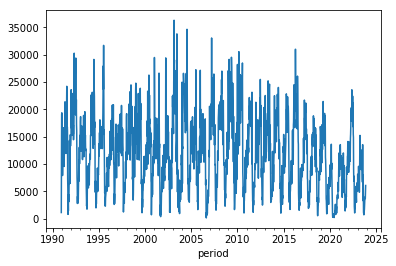

In [49]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

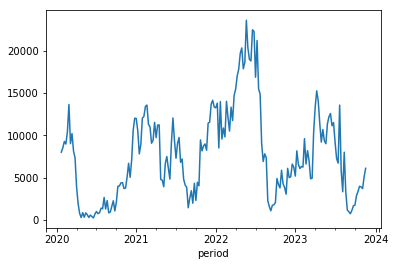

In [50]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [51]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [52]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

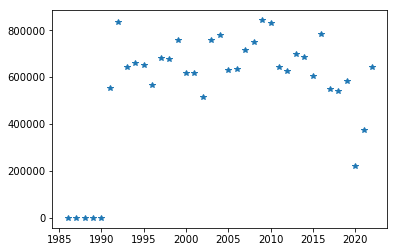

In [53]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [54]:
yearly_incidence.sort_values()

1986         0
1987         0
1988         0
1989         0
1990         0
2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1991    553090
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

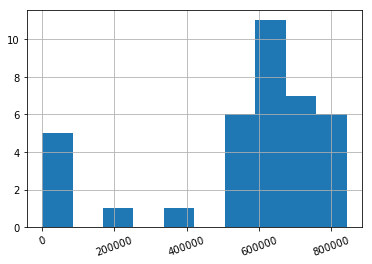

In [55]:
yearly_incidence.hist(xrot=20)